# Cindy Lo's Web Scraping Project: Realtor.ca 


# Table of Content

# Contents
- [Getting started: Installation ](#1.-Getting-started:-Installation)
- [Open Realtor.ca Through Webdriver](#2.-Open-Web-Through-Webdriver-to-Search-On-Realtor.ca)
- [Scraping Data Using Beautiful Soup /Selenium](#3-Scraping-Data-Using-Beautiful-Soup-/Selenium)
- [Clean / Manipulate data using Pandas](#4-Clean-/-Manipulate-data-using-Pandas)
- [Data Visualizations using Matplotlib / Seaborn / Plotly](#5-Analysis-/-Visualizations-using-Matplotlib-/-Seaborn-/-Plotly)

# 1. Getting started: Installation 


### Install selenium python package 

In [2]:
!pip install selenium

In [11]:
!pip install webdriver-manager


  Obtaining dependency information for webdriver-manager from https://files.pythonhosted.org/packages/b1/51/b5c11cf739ac4eecde611794a0ec9df420d0239d51e73bc19eb44f02b48b/webdriver_manager-4.0.1-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


### Import Python Libraries 

In [3]:
import pandas as pd
from time import sleep 
import numpy as np #calculation tool on data set
import matplotlib.pyplot as plt #data visualization tool
%matplotlib inline 
import matplotlib.colors as mcolors
import seaborn as sns
import re
import random
from selenium.webdriver.common.by import By

### Import Webdriver Beautiful Soup

In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

In [5]:
#selenium is to navigate code easier but if i keep using selenium multiple times i may be blocked as a hacker

# 2. Open Web Through Webdriver to Search On Realtor.ca

In [29]:
# Install and set up ChromeDriver
chrome_service = Service(ChromeDriverManager().install())

# Create a WebDriver instance with the service
driver = webdriver.Chrome(service=chrome_service)

# Go to Realtor.ca
driver.get("https://www.remax.ca/on/toronto-real-estate?lang=en&pageNumber=1")

# Wait until the search bar element is present
wait = WebDriverWait(driver, 5)
search_bar = wait.until(EC.presence_of_element_located((By.NAME, 'SearchBox')))
search_bar.send_keys("Mississauga")
search_bar.send_keys(Keys.RETURN)


TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00C4C1C3+27395]
	(No symbol) [0x00BE3DC4]
	(No symbol) [0x00AE1B7F]
	(No symbol) [0x00B22C65]
	(No symbol) [0x00B22D3B]
	(No symbol) [0x00B5EC82]
	(No symbol) [0x00B439E4]
	(No symbol) [0x00B5CB24]
	(No symbol) [0x00B43736]
	(No symbol) [0x00B17541]
	(No symbol) [0x00B180BD]
	GetHandleVerifier [0x00F03A93+2876371]
	GetHandleVerifier [0x00F57F5D+3221661]
	GetHandleVerifier [0x00CCD634+556916]
	GetHandleVerifier [0x00CD474C+585868]
	(No symbol) [0x00BECE04]
	(No symbol) [0x00BE9818]
	(No symbol) [0x00BE99B7]
	(No symbol) [0x00BDBF0E]
	BaseThreadInitThunk [0x766F7BA9+25]
	RtlInitializeExceptionChain [0x773DC10B+107]
	RtlClearBits [0x773DC08F+191]


In [22]:
# Open a webdriver to direct to the webs
driver = webdriver.Chrome('E:\chromedriver-win64\chromedriver-win64\chromedriver.exe')

## Go to Realtor.ca in the get method
#driver.get(webpage) - pass in the webpage you want to visit
driver.get("https://www.remax.ca/on/toronto-real-estate?lang=en&pageNumber=1")

AttributeError: 'str' object has no attribute 'capabilities'

In [ ]:
# Manually pass verifying identification through puzzle 

In [33]:
##This is to click the find a home on realtor.ca
driver.find_element(By.XPATH,'//*[@id="headerMenu"]/div[1]/a').click()

#sleep for 3 minutes
sleep(3)


# Finding search bar on Realtor.ca
search_bar = driver.find_element(By.XPATH,'/html/body/form/div[5]/div[2]/span/div/div[1]/div/div[1]/div[1]/div[1]/div[2]/input[2]')

# Send elements into the search bar - Search for Toronto
search_bar.send_keys("Toronto")

# Press Enter/Return after typing Toronto on search
search_bar.send_keys(Keys.RETURN)

# 3 Scraping Data Using Beautiful Soup /Selenium

In [ ]:
# self-note: beautiful soup is to read, organize and paste the code to a variable name as a soup in jupyter

### Raw data using page source from Realtor.ca

In [34]:
#HTML code in Realtor.ca
#Read HTML code in Selenium (non-organized way) on Toronto search in Realtor.ca 
page_source=driver.page_source

#Send the HTML code to be displayed
page_source

'<html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head><style>.ssQIHO-checkbox-menu-item>span>span{background-color:#000;display:inline-block}@media (forced-colors:active),(prefers-contrast:more){.ssQIHO-checkbox-menu-item>span>span{background-color:ButtonText}}\n</style><style>.gm-style .gm-style-mtc label,.gm-style .gm-style-mtc div{font-weight:400}.gm-style .gm-style-mtc ul,.gm-style .gm-style-mtc li{-webkit-box-sizing:border-box;box-sizing:border-box}.gm-style-mtc-bbw{display:-webkit-box;display:-webkit-flex;display:flex}.gm-style-mtc-bbw .gm-style-mtc:first-of-type>button{border-start-start-radius:2px;border-end-start-radius:2px}.gm-style-mtc-bbw .gm-style-mtc:last-of-type>button{border-start-end-radius:2px;border-end-end-radius:2px}sentinel{}\n</style><style>.LGLeeN-keyboard-shortcuts-view{display:-webkit-box;display:-webkit-flex;display:-moz-box;display:-ms-flexbox;display:flex}.LGLeeN-keyboard-shortcuts-view table,.LGLeeN-keyboard-shortcuts-view tbody,.LGLeeN-keyboard-shor

In [35]:
from selenium.webdriver.common.by import By
driver.find_element(By.TAG_NAME, 'a')

<selenium.webdriver.remote.webelement.WebElement (session="f30d5b1651c061eea3689b5ccf4c2a94", element="f.2D0694F94D96ECB7B1C398A02C6D7993.d.9485214E34B93BD7F385E1086D23A784.e.491")>

### Raw data using BeautifulSoup from Realtor.ca

In [ ]:
#Read HTML code in Beautifulsoup (organized way) on Toronto search in Realtor.ca 

In [36]:
rawsoup= BeautifulSoup(page_source)

In [37]:
rawsoup

<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><style>.ssQIHO-checkbox-menu-item>span>span{background-color:#000;display:inline-block}@media (forced-colors:active),(prefers-contrast:more){.ssQIHO-checkbox-menu-item>span>span{background-color:ButtonText}}
</style><style>.gm-style .gm-style-mtc label,.gm-style .gm-style-mtc div{font-weight:400}.gm-style .gm-style-mtc ul,.gm-style .gm-style-mtc li{-webkit-box-sizing:border-box;box-sizing:border-box}.gm-style-mtc-bbw{display:-webkit-box;display:-webkit-flex;display:flex}.gm-style-mtc-bbw .gm-style-mtc:first-of-type>button{border-start-start-radius:2px;border-end-start-radius:2px}.gm-style-mtc-bbw .gm-style-mtc:last-of-type>button{border-start-end-radius:2px;border-end-end-radius:2px}sentinel{}
</style><style>.LGLeeN-keyboard-shortcuts-view{display:-webkit-box;display:-webkit-flex;display:-moz-box;display:-ms-flexbox;display:flex}.LGLeeN-keyboard-shortcuts-view table,.LGLeeN-keyboard-shortcuts-view tbody,.LGLeeN-keyboard-shortcu

In [38]:
# The <div> tag defines a division or a section in an HTML document
#grab only the first element which is 'Find a Home' on top left tab in beautifulsoup
rawsoup.find('div', class_='headerMenuItem') #Div may change over time


<div class="headerMenuItem"><a href="/map">Find a Home</a></div>

In [39]:
#grab all elements on top left tab in beautifulsoup
rawsoup.find_all('div', class_='headerMenuItem') #Div may change over time


[<div class="headerMenuItem"><a href="/map">Find a Home</a></div>,
 <div class="headerMenuItem">
 <div class="headerMenuItemText">
             
     Find a REALTOR<sup>®</sup>
 <img alt="" class="dropdownIcon" src="/images/common/icons/svg/arrowdown.svg" style="height: 8px; width: 15px;"/>
 </div>
 <div class="topMenuDropdownContent hide">
 <a class="topMenuDropdownItem" href="/realtors/location">Location</a>
 <a class="topMenuDropdownItem" href="/realtors/name">Name</a>
 <a class="topMenuDropdownItem" href="/brokerage">Office</a>
 </div>
 </div>,
 <div class="headerMenuItem">
 <div class="headerMenuItemText">
             Mortgage Calculators
             <img alt="" class="dropdownIcon" src="/images/common/icons/svg/arrowdown.svg" style="height: 8px; width: 15px;"/>
 </div>
 <div class="topMenuDropdownContent hide">
 <a class="topMenuDropdownItem" href="/calculator/mortgage-calculator">Payment Calculator</a>
 <a class="topMenuDropdownItem" href="/calculator/refinance-calculator">Ref

In [42]:
#select for sale
rawsoup.find_all('span', {'class':'select2-selection__rendered'})[0].get_text().strip()

'For sale'

In [43]:
#select listings'address
rawsoup.find_all('div', {'class':'smallListingCardAddress'})

[<div class="smallListingCardAddress" data-binding="innertext=Address">306 KING STREET E, Mississauga, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">34 TRUEMAN AVENUE, Toronto W08, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">37 NIPISSING CRESCENT, Brampton, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">3 ABBOTSBURY DRIVE, Brampton, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">86 ENFORD CRESCENT, Brampton, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">56 LOVILLA BOULEVARD, Toronto W05, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">58 FOXACRE ROW, Brampton, Ontario </div>,
 <div class="smallListingCardAddress" data-binding="innertext=Address">205 - 9 MICHAEL POWER PLACE, Toronto W08, Ontario </div>,
 <div class="smallListingCardAddress" data-b

In [44]:
#select all to find listing price
rawsoup.find_all('div', {'class':'smallListingCardPrice'})

[<div class="smallListingCardPrice" data-binding="data-value-cad={Price},innertext=DisplayPrice,hidden=ListingIsSold" data-value-cad="$2,800,000 ">$2,800,000 </div>,
 <div class="smallListingCardPrice" data-binding="data-value-cad={Price},innertext=DisplayPrice,hidden=ListingIsSold" data-value-cad="$1,399,900 ">$1,399,900 </div>,
 <div class="smallListingCardPrice" data-binding="data-value-cad={Price},innertext=DisplayPrice,hidden=ListingIsSold" data-value-cad="$1,490,000 ">$1,490,000 </div>,
 <div class="smallListingCardPrice" data-binding="data-value-cad={Price},innertext=DisplayPrice,hidden=ListingIsSold" data-value-cad="$1,499,990 ">$1,499,990 </div>,
 <div class="smallListingCardPrice" data-binding="data-value-cad={Price},innertext=DisplayPrice,hidden=ListingIsSold" data-value-cad="$1,350,000 ">$1,350,000 </div>,
 <div class="smallListingCardPrice" data-binding="data-value-cad={Price},innertext=DisplayPrice,hidden=ListingIsSold" data-value-cad="$1,259,000 ">$1,259,000 </div>,
 <di

In [63]:
#select all to find first listing price
rawsoup.find_all('div', {'class':'smallListingCardPrice'})[0].get_text().strip()

'$2,800,000'

# 4 Clean / Manipulate data using Pandas

In [58]:
# Initialize lists to store data
price = []
address = []
bedroom = []
room = []
bathroom = []

# Loop through pages
for page in range(1, 5):  # Adjust the range as needed
    # Code to navigate to each page and retrieve data
    sleep(2)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    print("Page no.", page)

    # Retrieve page source and parse with BeautifulSoup
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Loop through each house listing on the page
    for house in soup.find_all('div', class_='cardCon'):
        # Extract price and address
        price.append(house.find('div', class_='smallListingCardPrice').get_text())
        try:
            address.append(house.find('div', class_='smallListingCardAddress').get_text())
        except:
            address.append("No Address")

        # Extract rooms information
        rooms = house.find_all('div', class_='smallListingCardIconNum')

        if len(rooms) >= 2:
            # Splitting bedrooms and dens if present
            try:
                bedroom_info = rooms[0].get_text().strip().split('+')
                bedroom.append(bedroom_info[0].strip())
                room.append(bedroom_info[1].strip() if len(bedroom_info) > 1 else '0')
            except IndexError:
                bedroom.append('0')
                room.append('0')

            # Extracting bathrooms
            try:
                bathroom.append(rooms[1].get_text())
            except:
                bathroom.append('0')

        elif len(rooms) == 1:
            # Only one room, assume it's a bathroom
            bathroom.append(rooms[0].get_text())
            bedroom.append('0')
            room.append('0')

        else:
            # No room information found
            bedroom.append('0')
            room.append('0')
            bathroom.append('0')

    # Clicking on the next page button
    try:
        next_button = driver.find_element(By.XPATH, '/html/body/form/div[5]/div[2]/span/div/div[3]/div/div[1]/div[2]/div[4]/span/div/a[3]/div')
        next_button.click()
    except NoSuchElementException:
        break  # Exit the loop if no more next button is found


Page no. 1
Page no. 2
Page no. 3
Page no. 4


In [ ]:
#Explanation:
#Data Retrieval: The code retrieves the price, address, and room information (bedroom, room, bathroom) for each house listing on the page using BeautifulSoup.
#Handling Room Information: The rooms list is checked to determine how many rooms are listed. If there are two entries (bedroom and room/den), they are split and assigned accordingly. If there's only one room, it's assumed to be a bathroom. If there are no rooms listed, default values of '0' are assigned for all room types.

#Pagination: The code includes pagination logic to click on the next page button (next_button) using Selenium. It attempts to find the next button and clicks it, continuing to the next page until the loop completes or no more pages are available.

#Ensure your Selenium setup and HTML structure match your specific website's layout and pagination mechanism. Adjust the XPath or other locator strategies (By.XPATH, By.CLASS_NAME, etc.) as needed to match your website's structure.

#This should help ensure that bedroom and other lists are populated correctly with values corresponding to each house listing, matching the length of price and address.

In [ ]:
#Creating new columns
price =[]
address= []
bedroom=[]
room=[]
bathroom=[]
#Try to use for loops to use selenium list and beautiful to extract all info to collect on that page 
## big  loop gonna be for looping over pages
page=1
for page in range(1,100): #page is gonna be range from pg.1 to pg.100 to collect over 1000 data rows
        
    ##adding sleep to delay in scraping to avoid server overload
    sleep(2)
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    print("page no.",page)

    #### open the page source through driver
    page_source = driver.page_source
    page_source

    #### You can also use BeautifulSoup to parse the html. Note: parse means to describe html
    soup = BeautifulSoup(page_source)

    ## use beautiful soup in inner loop to loop over all houses in that page
    for house in soup.find_all('div',class_='cardCon'):
        price.append(house.find('div',class_='smallListingCardPrice').get_text())
        try:
            address.append(house.find('div', class_= 'smallListingCardAddress').get_text())
        except:
            address.appen("No Address")
        rooms = house.find_all('div',class_='smallListingCardIconNum')
       
        if(len(rooms)==2):
            print('inside bedroom')
            try:
                bedroom.append(rooms[0].get_text().split('+')[0].strip())
                
            except:
                bedroom.append(0)
                
                
            try:
                room.append(rooms[0].get_text().split('+')[1].strip())
            except:
                room.append(0)
                

            try:
                bathroom.append(rooms[1].get_text())
            except:
                bathroom.append(0)
                
                
        if(len(rooms)==1):
            bathroom.append(rooms[0].get_text())
            bedroom.append(0)
            room.append(0)
            
        if(len(rooms)== 0):
            bathroom.append(0)
            bedroom.append(0)
            room.append(0)
                  
    driver.find_element(By.XPATH,'/html/body/form/div[5]/div[2]/span/div/div[3]/div/div[1]/div[2]/div[4]/span/div/a[3]/div').click()


In [59]:
#check the length of listing
len(price)

48

In [60]:
#check the length of listing
len(address)

48

In [61]:
#check the length of listing
len(bedroom)

48

In [52]:
#Complete checking and it's good

## Table of Cleaned Data Using Pandas

In [120]:
houses = pd.DataFrame()

houses['price'] =price
houses['address'] = address
houses['bedroom'] = bedroom
houses['den'] = room
houses['bathroom'] =bathroom
houses

,price,address,bedroom,den,bathroom
0,"$535,000","1007 - 360 SQUARE ONE DRIVE, Mississauga, Onta...",1,0,1
1,"$520,000","506 - 56 ANNIE CRAIG DRIVE, Toronto W06, Ontario",1,1,1
2,"$1,199,000","57 SEDGEBROOK CRESCENT, Toronto W08, Ontario",3,1,2
3,"$999,800","69 TWENTY FIFTH STREET, Toronto W06, Ontario",1,1,3
4,"$618,000","409 - 1185 THE QUEENSWAY, Toronto W08, Ontario",1,1,2
5,"$625,000","706 - 55 STRATHAVEN DRIVE, Mississauga, Ontario",2,0,2
6,"$2,159,000","1357 SAGINAW CRESCENT, Mississauga, Ontario",3,1,3
7,"$489,900","1101 - 1185 THE QUEENSWAY AVENUE, Toronto W08,...",1,0,1
8,"$999,000","5954 ALGARVE Drive, Mississauga, Ontario",3,0,3
9,"$569,000","15 WINDERMERE Avenue Unit# 1212, Toronto, Onta...",1,0,1


### Convert dataframe into csv.file 

In [102]:
try:
    houses.to_csv('C:\\Users\\tests\\Downloads\\house.csv', index=False)
    print("CSV file saved successfully!")
except Exception as e:
    print(f"Error saving CSV file: {str(e)}")

CSV file saved successfully!


In [96]:
#2nd Way of saving data into csv file- Convert dataframes into csv file for data visualization
#name csv file as houses in the quotation mark
#houses.to_csv('file_path', index=False) #saved where the local project is which is in the download folder
houses.to_csv('houses.csv', index=False)


### Reload data from csv.file 

In [140]:
# Load the data from houses.csv into a DataFrame
houses = pd.read_csv('C:\\Users\\tests\\Downloads\\house.csv')

### Create a new column to extract city out from the table 

In [127]:
#Extract the city out from the address
houses['city'] = houses['address'].apply(lambda x: x.split(',')[-2].strip() if len(x.split(',')) >= 2 else 'Unknown')

In [128]:
houses

,price,address,bedroom,den,bathroom,city
0,"$535,000","1007 - 360 SQUARE ONE DRIVE, Mississauga, Onta...",1,0,1,Mississauga
1,"$520,000","506 - 56 ANNIE CRAIG DRIVE, Toronto W06, Ontario",1,1,1,Toronto W06
2,"$1,199,000","57 SEDGEBROOK CRESCENT, Toronto W08, Ontario",3,1,2,Toronto W08
3,"$999,800","69 TWENTY FIFTH STREET, Toronto W06, Ontario",1,1,3,Toronto W06
4,"$618,000","409 - 1185 THE QUEENSWAY, Toronto W08, Ontario",1,1,2,Toronto W08
5,"$625,000","706 - 55 STRATHAVEN DRIVE, Mississauga, Ontario",2,0,2,Mississauga
6,"$2,159,000","1357 SAGINAW CRESCENT, Mississauga, Ontario",3,1,3,Mississauga
7,"$489,900","1101 - 1185 THE QUEENSWAY AVENUE, Toronto W08,...",1,0,1,Toronto W08
8,"$999,000","5954 ALGARVE Drive, Mississauga, Ontario",3,0,3,Mississauga
9,"$569,000","15 WINDERMERE Avenue Unit# 1212, Toronto, Onta...",1,0,1,Toronto


# 5 Analysis / Visualizations using Matplotlib / Seaborn / Plotly

In [129]:
# Pie chart: mean house listing's price in % in a city

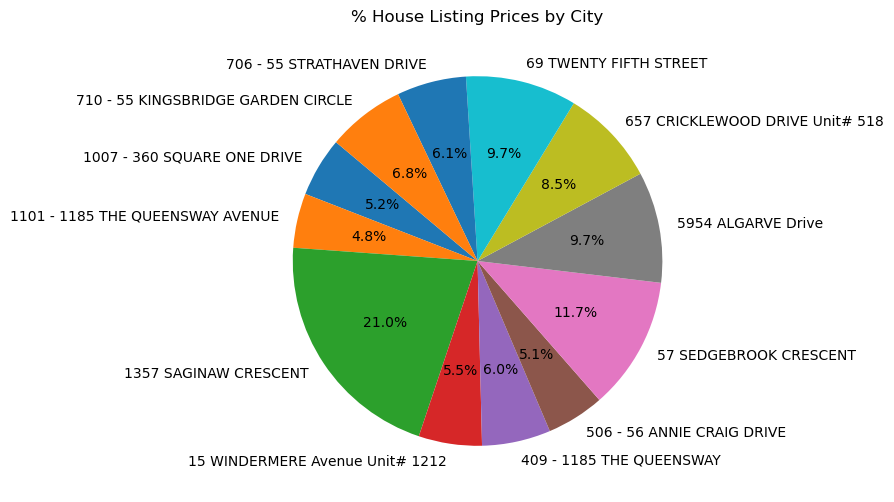

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data setup (replace this with your actual data)

# Extracting the city from the address column
houses['city'] = houses['address'].apply(lambda x: x.split(',')[0].strip() if len(x.split(',')) >= 2 else 'Unknown')

# Adjusting city names to group Toronto listings
houses['city'] = houses['city'].apply(lambda x: 'Toronto' if 'Toronto' in x else x)

# Removing the '$' sign and converting price to numeric
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by city and calculating the average house price
average_prices = houses.groupby('city')['price'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
average_prices.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('% House Listing Prices by City')
plt.ylabel('')  # Remove the y-axis label for cleaner presentation
plt.show()


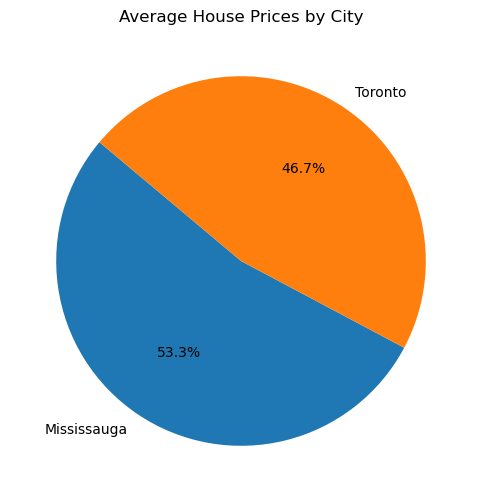

In [131]:
# Load the CSV file into a DataFrame
houses = pd.read_csv('houses.csv')

# Extracting the city from the address column
houses['city'] = houses['address'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) >= 2 else 'Unknown')

# Adjusting city names to group Toronto listings
houses['city'] = houses['city'].apply(lambda x: 'Toronto' if 'Toronto' in x else x)

# Removing the '$' sign and converting price to numeric
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by city and calculating the average house price
average_prices = houses.groupby('city')['price'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
average_prices.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Average House Prices by City')
plt.ylabel('')  # Remove the y-axis label for cleaner presentation
plt.show()


In [157]:
# Remove non-numeric characters ($) and convert to numeric format
houses['C:\\Users\\tests\\Downloads\\house.csv'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)
houses


,price,address,bedroom,den,bathroom,C:\Users\tests\Downloads\house.csv,city
0,535000,"1007 - 360 SQUARE ONE DRIVE, Mississauga, Onta...",1,0,1,535000,Mississauga
1,520000,"506 - 56 ANNIE CRAIG DRIVE, Toronto W06, Ontario",1,1,1,520000,Toronto W06
2,1199000,"57 SEDGEBROOK CRESCENT, Toronto W08, Ontario",3,1,2,1199000,Toronto W08
3,999800,"69 TWENTY FIFTH STREET, Toronto W06, Ontario",1,1,3,999800,Toronto W06
4,618000,"409 - 1185 THE QUEENSWAY, Toronto W08, Ontario",1,1,2,618000,Toronto W08
5,625000,"706 - 55 STRATHAVEN DRIVE, Mississauga, Ontario",2,0,2,625000,Mississauga
6,2159000,"1357 SAGINAW CRESCENT, Mississauga, Ontario",3,1,3,2159000,Mississauga
7,489900,"1101 - 1185 THE QUEENSWAY AVENUE, Toronto W08,...",1,0,1,489900,Toronto W08
8,999000,"5954 ALGARVE Drive, Mississauga, Ontario",3,0,3,999000,Mississauga
9,569000,"15 WINDERMERE Avenue Unit# 1212, Toronto, Onta...",1,0,1,569000,Toronto


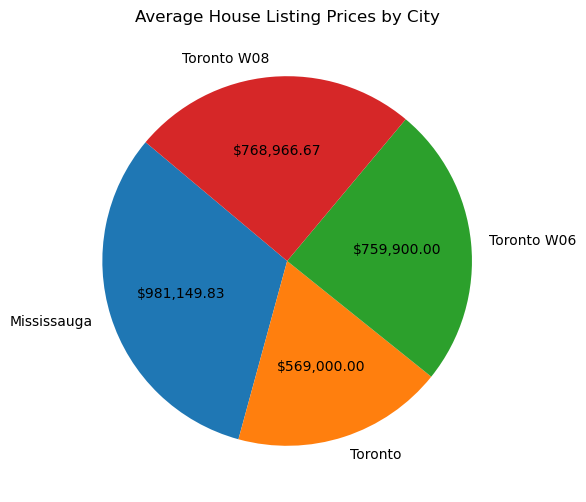

In [158]:
#Pie chart: average house listing's price in a city
# Extracting the city from the address column
houses['city'] = houses['address'].apply(lambda x: x.split(',')[-2].strip() if len(x.split(',')) >= 2 else 'Unknown')

# Removing the '$' sign and converting price to numeric
houses['price'] = houses['price'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by city and calculating the average house price listing in each city
average_prices = houses.groupby('city')['price'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
# Converting the percentages in autopct to average price numbers
average_prices.plot(kind='pie', autopct=lambda p: '${:,.2f}'.format(p * sum(average_prices) / 100), startangle=140)
plt.title('Average House Listing Prices by City')
plt.ylabel('')
plt.show()

In [153]:
# Set pandas options to display full numbers
pd.options.display.float_format = '{:.0f}'.format

In [154]:
# Now calculate the mean price by city
average_prices_by_city = houses.groupby('city')['price'].mean()

In [155]:
average_prices_by_city 

city
Mississauga   981150
Toronto       569000
Toronto W06   759900
Toronto W08   768967
Name: price, dtype: float64

C:\Users\tests\AppData\Local\Temp\ipykernel_110384\569579593.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


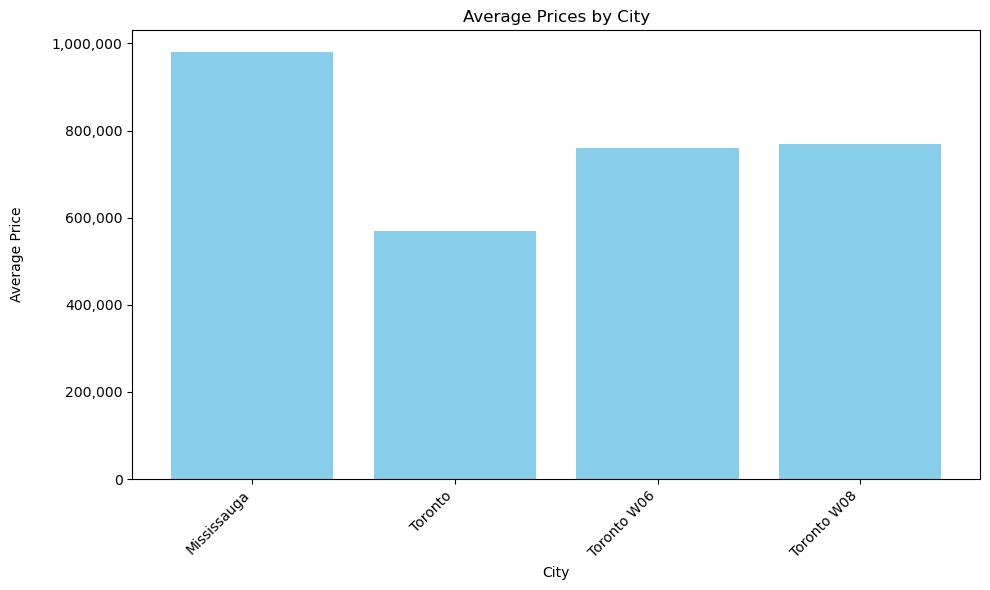

In [156]:
#Bar chart: average house listing's price in a city
# Define the data
cities = average_prices_by_city.index
avg_prices = average_prices_by_city.values

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cities, avg_prices , color='skyblue')

# Customize the chart
plt.title('Average Prices by City')
plt.xlabel('City')
plt.ylabel('Average Price', labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Format y-axis tick labels to display full numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))
#gets the current axes instance, retrieves y-axis associated with the current axes, sets the major formatter for the y-axis tick labels
#lambda function formats each tick label('x')

plt.tight_layout()

# Show the plot
plt.show()

